In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import random
import seaborn as sns
import numpy as np

In [6]:
#making list of symptoms and frequency to use as column headers
sxs = {"Fatigue": 0.91, "Autonomic":0.18, "Sleep":0.88, "Pain":0.7, "Neurocognitive":0.17, "Neuroendocrine":0.2, "Immune":0.18, "Others":0.17}

Idea here is to make a list of 1000 people, where each person has a chance of having the symptom proportional to the frequency of symptoms observed in the table. A couple of clear problems with this approach emerge - chiefly, there is obviously collinearity between symptoms, but as a proof of concept, this works well. 

In [24]:
sxs_freq = []

for e in sxs.values():
    l = []
    for i in range(1000):
        if random.random() > e:
            l.append(0)
        else:
            l.append(1)
        
    sxs_freq.append(l)

In [26]:
sxs_df = pd.DataFrame(sxs_freq)
sxs_df = sxs_df.transpose()

In [31]:
sxs_df.columns = sxs.keys()
sxs_df

,Fatigue,Autonomic,Sleep,Pain,Neurocognitive,Neuroendocrine,Immune,Others
0,0,0,1,0,1,0,0,0
1,1,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,1
3,1,0,1,0,0,0,0,0
4,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
995,1,0,1,1,0,1,1,0
996,1,0,1,1,0,0,0,0
997,1,0,1,1,0,1,1,1
998,1,0,1,1,0,0,1,1


In [66]:
## PCA STEP
from sklearn.decomposition import PCA

pca = PCA(2)
pca_df = pca.fit_transform(sxs_df)


In [34]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [67]:
model = KMeans()

label = model.fit_predict(pca_df)



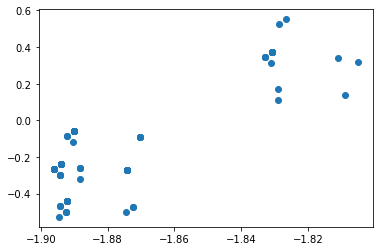

In [68]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = pca_df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

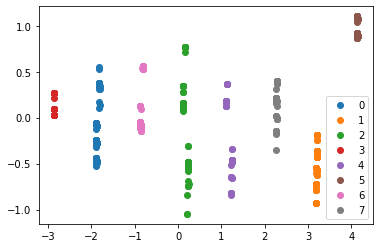

In [77]:
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_df[label == i , 0] , pca_df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [78]:
from kmodes.kmodes import KModes

kmode = KModes()
label = kmode.fit_predict(pca_df)
label

array([0, 1, 0, 1, 3, 0, 4, 5, 5, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 5, 0, 1, 1, 0, 0, 0, 0, 0, 7, 0, 0, 1, 0, 5, 0, 0, 5, 0, 0, 7,
       5, 0, 5, 0, 1, 6, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       7, 1, 6, 0, 5, 0, 0, 0, 6, 1, 0, 6, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 7, 7, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 5, 0, 5, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 2, 0, 0, 0, 7, 0,
       0, 0, 0, 6, 0, 0, 1, 0, 0, 0, 6, 1, 0, 5, 0, 0, 0, 0, 0, 6, 0, 0,
       0, 2, 0, 1, 1, 0, 7, 7, 0, 5, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 2, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 6, 0, 2, 0, 0, 0, 0, 7, 0, 0,
       0, 5, 0, 0, 0, 0, 7, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 5, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

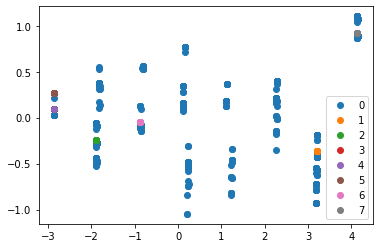

In [79]:
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_df[label == i , 0] , pca_df[label == i , 1] , label = i)
plt.legend()
plt.show()